<a href="https://colab.research.google.com/github/rushikeshnaik779/tfcerti/blob/main/CNN_and_CV_for_Binnary_Class_using_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to computer vission and CNN using Tensorflow 

Computer vision is the practice of writting algorithms which can discover patterns in visual data. Such as the camera of self driving car recognizing the car infront

## Get the data 

In [ ]:
import zipfile 
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file 
zip_ref = zipfile.ZipFile("pizza_steak.zip")

--2021-08-19 02:03:46--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.199.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.199.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   149MB/s    in 0.7s    

2021-08-19 02:03:47 (149 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



In [ ]:
zip_ref.extractall()
zip_ref.close()

## Inspect the data (become one with it )

A very crucial step at the begining

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os 

# walk through pizza_steak directory 

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'pizza_steak'.
There are 2 directories and 1 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 1 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [ ]:
!ls -la pizza_steak

total 24
drwxr-xr-x 4 root root 4096 Aug 19 02:03 .
drwxr-xr-x 1 root root 4096 Aug 19 02:03 ..
-rw-r--r-- 1 root root 6148 Aug 19 02:03 .DS_Store
drwxr-xr-x 4 root root 4096 Aug 19 02:03 test
drwxr-xr-x 4 root root 4096 Aug 19 02:03 train


In [ ]:
# ANother way to find out how many imahes are in a file 

num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images first let's get the class names programmatically 

In [ ]:
# Get the classnames programmiticxally 

import pathlib 
import numpy as np 
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names = class_names[1:]
class_names

array(['pizza', 'steak'], dtype='<U9')

In [ ]:
# Let's vosialize the images 

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import random 

def view_random_image(target_dir, target_class):
    # Setup the target directory (we will view images from here )
    target_folder = target_dir+target_class 

    # get random images path 
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)

    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder+'/'+random_image[0])

    plt.imshow(img)
    plt.title(target_class, size=22)
    plt.axis("off")

    print(f'Image shape: {img.shape}')

    return img

['3644733.jpg']
Image shape: (512, 512, 3)


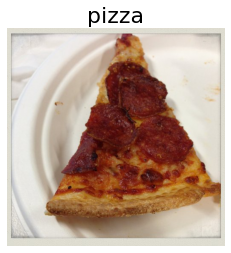

In [ ]:
img = view_random_image(target_dir='pizza_steak/train/', 
                  target_class = "pizza")

In [ ]:
img.shape

(512, 512, 3)

In [ ]:
# return width height, color channels 


In [ ]:
# get all the pixel values 0 to 1 
img/ 255.

array([[[0.8745098 , 0.86666667, 0.81960784],
        [0.87843137, 0.87058824, 0.82352941],
        [0.88235294, 0.8745098 , 0.82745098],
        ...,
        [0.89803922, 0.89019608, 0.84313725],
        [0.89019608, 0.88235294, 0.83529412],
        [0.87058824, 0.8627451 , 0.81568627]],

       [[0.8745098 , 0.86666667, 0.81960784],
        [0.8745098 , 0.86666667, 0.81960784],
        [0.87843137, 0.87058824, 0.82352941],
        ...,
        [0.88627451, 0.87843137, 0.83137255],
        [0.88627451, 0.87843137, 0.83137255],
        [0.87843137, 0.87058824, 0.82352941]],

       [[0.8745098 , 0.86666667, 0.81960784],
        [0.87843137, 0.87058824, 0.82352941],
        [0.87843137, 0.87058824, 0.82352941],
        ...,
        [0.87058824, 0.8627451 , 0.81568627],
        [0.87843137, 0.87058824, 0.82352941],
        [0.8745098 , 0.86666667, 0.81960784]],

       ...,

       [[0.8627451 , 0.8627451 , 0.81568627],
        [0.85882353, 0.85882353, 0.81176471],
        [0.85490196, 0

# End to end example 

* Load images 
* preprocess images 
* build a cnn 
* compile our cnn
* fit cnn with out traiiining data 

In [ ]:
import tensorflow as tf 

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# set the seed 

tf.random.set_seed(42)

# preprocess the data ( get all of the pixel values between 0 & 1 also called)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#setup paths to our data directories 
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"




# import data from directories and turn it inot batches 
train_data = train_datagen.flow_from_directory(directory = train_dir, 
                                                 batch_size = 32,
                                                 target_size=(224, 224), 
                                                 class_mode="binary", 
                                                 seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir, 
                                                 batch_size=32, 
                                                 target_size= (224, 224), 
                                                 class_mode="binary",
                                                 seed=42)


# bUild a cnn model ( same a tinny vgg on cnn explainer website )

model_1= tf.keras.models.Sequential([
                                     tf.keras.layers.Conv2D(filters=10, 
                                                            kernel_size=3,
                                                            activation="relu", 
                                                            input_shape=(224, 224, 3)),
                                     tf.keras.layers.Conv2D(10, 3, activation="relu"),
                                     tf.keras.layers.MaxPool2D(pool_size=2, 
                                                               padding="valid"),
                                     tf.keras.layers.Conv2D(10, 3, activation="relu"),
                                     tf.keras.layers.Conv2D(10, 3, activation="relu"),
                                     tf.keras.layers.MaxPool2D(2),
                                     tf.keras.layers.Flatten(),
                                     tf.keras.layers.Dense(1, activation="sigmoid")
])



model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

history = model_1.fit(train_data,
                      epochs= 5, 
                      steps_per_epoch=len(train_data),
                      validation_data = valid_data, 
                      validation_steps = len(valid_data)
                      )


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 41s 197ms/step - loss: 0.5397 - accuracy: 0.7287 - val_loss: 0.3985 - val_accuracy: 0.8500
Epoch 2/5
47/47 [==============================] - 9s 183ms/step - loss: 0.4370 - accuracy: 0.8133 - val_loss: 0.3507 - val_accuracy: 0.8540
Epoch 3/5
47/47 [==============================] - 9s 185ms/step - loss: 0.4009 - accuracy: 0.8260 - val_loss: 0.3389 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 9s 187ms/step - loss: 0.3862 - accuracy: 0.8453 - val_loss: 0.3147 - val_accuracy: 0.8760
Epoch 5/5
47/47 [==============================] - 9s 186ms/step - loss: 0.3458 - accuracy: 0.8560 - val_loss: 0.2979 - val_accuracy: 0.8800



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
* Epoch 1/5
47/47 [==============================] - 120s 3s/step - loss: 0.5753 - accuracy: 0.7100 - val_loss: 0.4288 - val_accuracy: 0.8300
* Epoch 2/5
47/47 [==============================] - 115s 2s/step - loss: 0.4214 - accuracy: 0.8167 - val_loss: 0.3529 - val_accuracy: 0.8580
* Epoch 3/5
47/47 [==============================] - 115s 2s/step - loss: 0.3781 - accuracy: 0.8307 - val_loss: 0.4061 - val_accuracy: 0.8080
Epoch 4/5
47/47 [==============================] - 116s 2s/step - loss: 0.3667 - accuracy: 0.8480 - val_loss: 0.3235 - val_accuracy: 0.8800
Epoch 5/5
13/47 [=======>......................] - ETA: 1:13 - loss: 0.3103 - accuracy: 0.8786

> If the above cell taking longer than 10 secs per epoch, make sure you are using a GPU 

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [ ]:
tf.random.set_seed(42)

# create a model to replicate the tensorflow playground model 
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(4, activation="relu"), 
                               tf.keras.layers.Dense(1, activation="sigmoid")
])


# compile the model 
model_2.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)


# fit the model 
history_2 = model_2.fit(train_data, 
                        epochs=5, 
                        steps_per_epoch=len(train_data),
                        validation_data = valid_data, 
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 177ms/step - loss: 0.6983 - accuracy: 0.4913 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 170ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 171ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 171ms/step - loss: 0.6932 - accuracy: 0.4933 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 170ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
tf.random.set_seed(42)

# create a model to replicate the tensorflow playground model 
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
                               tf.keras.layers.Dense(100, activation="relu"),
                               tf.keras.layers.Dense(40, activation="relu"), 
                               tf.keras.layers.Dense(1, activation="sigmoid")
])


# compile the model 
model_3.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)


# fit the model 
history_3 = model_3.fit(train_data, 
                        epochs=5, 
                        steps_per_epoch=len(train_data),
                        validation_data = valid_data, 
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 175ms/step - loss: 4.4474 - accuracy: 0.6493 - val_loss: 1.0591 - val_accuracy: 0.7260
Epoch 2/5
47/47 [==============================] - 8s 170ms/step - loss: 0.8765 - accuracy: 0.7313 - val_loss: 1.3406 - val_accuracy: 0.6000
Epoch 3/5
47/47 [==============================] - 8s 170ms/step - loss: 1.9502 - accuracy: 0.6680 - val_loss: 3.5626 - val_accuracy: 0.6820
Epoch 4/5
47/47 [==============================] - 8s 168ms/step - loss: 1.7197 - accuracy: 0.7573 - val_loss: 0.8756 - val_accuracy: 0.7280
Epoch 5/5
47/47 [==============================] - 8s 171ms/step - loss: 0.5258 - accuracy: 0.7980 - val_loss: 0.7092 - val_accuracy: 0.7240


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_5 (Dense)              (None, 40)                4040      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 41        
Total params: 15,056,981
Trainable params: 15,056,981
Non-trainable params: 0
_________________________________________________________________


# Becoming one with the data 

['1098844.jpg']
Image shape: (512, 512, 3)
['2622336.jpg']
Image shape: (512, 512, 3)


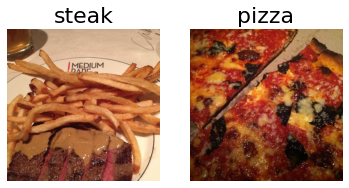

In [ ]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2, 2)
pizza_img = view_random_image("pizza_steak/train/","pizza")

# 3. Create a CNN Model (Start with a baseline)

A baseline a is a relatively simple model or existing result that you setup when beginning a machine learning experiment you try to beat the baseline

In [ ]:
# make the creating of our model a little easier 

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
model_4 = Sequential([
                      Conv2D(
                          filters=10, 
                          kernel_size=3, 
                          strides = 1, 
                          padding="valid", 
                          activation="relu",
                          input_shape=(224, 224, 3)),
                      Conv2D(10, 3, activation="relu"),
                      Conv2D(10, 3, activation="relu"),
                      Flatten(),
                      Dense(1, activation="sigmoid")

])




In [ ]:
model_4.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer = Adam(),
    metrics = ["accuracy"]
)

# fit the model 

In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_3 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# check the lengths of training and test data generators 
len(train_data), len(valid_data)

(47, 16)

In [ ]:
history_4 = model_4.fit(
    train_data, 
    epochs=5, 
    steps_per_epoch = len(train_data), 
    validation_data=valid_data, 
    validation_steps = len(valid_data)
)

Epoch 1/5
47/47 [==============================] - 10s 190ms/step - loss: 0.7221 - accuracy: 0.6980 - val_loss: 0.4287 - val_accuracy: 0.8220
Epoch 2/5
47/47 [==============================] - 9s 185ms/step - loss: 0.4387 - accuracy: 0.8040 - val_loss: 0.4137 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 9s 186ms/step - loss: 0.3122 - accuracy: 0.8813 - val_loss: 0.4690 - val_accuracy: 0.7920
Epoch 4/5
47/47 [==============================] - 9s 186ms/step - loss: 0.1717 - accuracy: 0.9473 - val_loss: 0.4373 - val_accuracy: 0.8000
Epoch 5/5
47/47 [==============================] - 9s 185ms/step - loss: 0.0712 - accuracy: 0.9800 - val_loss: 0.5447 - val_accuracy: 0.8000


# Evaluating our model 
It looks like our moedl is learning something

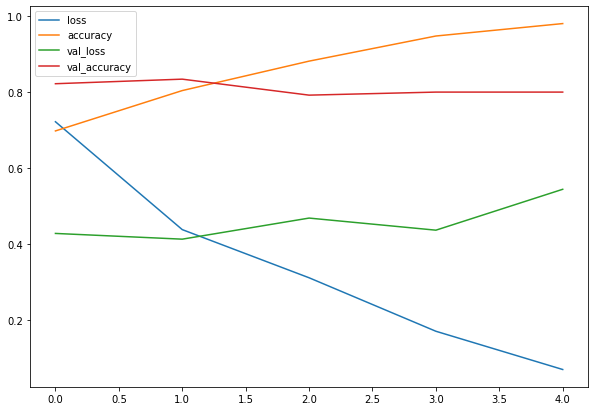

In [ ]:
import pandas as pd 


pd.DataFrame(history_4.history).plot(figsize=(10, 7));


In [ ]:
# Plot the validation and trianing curves separately 

def plot_loss_curves(history):
    """
    returns seprate loss curves

    """
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]


    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    # plotting loss
    plt.plot(epochs, loss, label="traiing_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()
    plt.show()

    # plotting accuracy 
    plt.plot(epochs, accuracy, label="training accuracy")
    plt.plot(epochs, val_accuracy, label="testing accuracy")
    plt.title("Accuracies")
    plt.xlabel("epochs")
    plt.legend()
    plt.show()




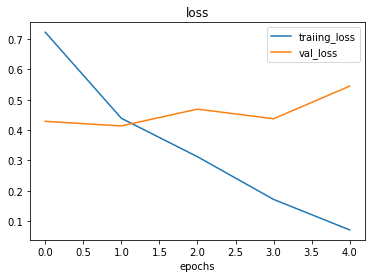

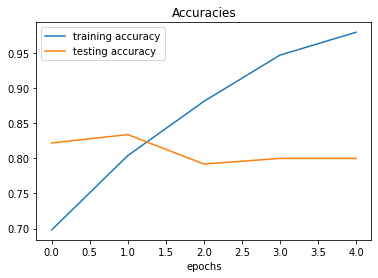

In [ ]:
plot_loss_curves(history_4)

# let's create a new baseline model 

In [ ]:
tf.random.set_seed(42)
model_5 = Sequential([
                      Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
                      MaxPool2D(pool_size=2),
                      Conv2D(10, 3, activation="relu"), 
                      MaxPool2D(),
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation="sigmoid")

])

In [ ]:
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer= Adam(), 
                metrics=["accuracy"])




In [ ]:
history_5 = model_5.fit(train_data, 
                        epochs=5, 
                        steps_per_epoch = len(train_data),
                        validation_data=valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 180ms/step - loss: 0.6022 - accuracy: 0.7040 - val_loss: 0.5241 - val_accuracy: 0.7160
Epoch 2/5
47/47 [==============================] - 8s 177ms/step - loss: 0.4660 - accuracy: 0.7813 - val_loss: 0.3733 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 8s 176ms/step - loss: 0.4288 - accuracy: 0.8120 - val_loss: 0.3633 - val_accuracy: 0.8680
Epoch 4/5
47/47 [==============================] - 8s 177ms/step - loss: 0.3832 - accuracy: 0.8333 - val_loss: 0.3079 - val_accuracy: 0.8760
Epoch 5/5
47/47 [==============================] - 8s 175ms/step - loss: 0.3663 - accuracy: 0.8427 - val_loss: 0.3313 - val_accuracy: 0.8680


In [ ]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6760)             

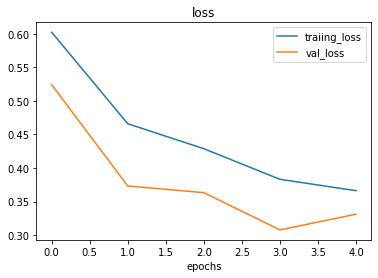

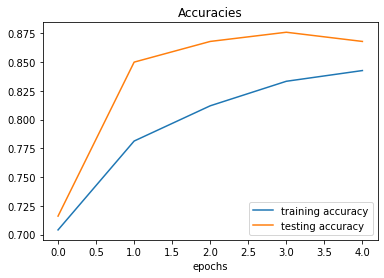

In [ ]:
plot_loss_curves(history_5)

In [ ]:
# Opening our bag of tricks and finding data augmentationn

train_datagen_augmented = ImageDataGenerator(
    rescale=1/255.,
    rotation_range = 0.2, 
    shear_range=0.2, 
    zoom_range = 0.2, 
    width_shift_range = 0.2, 
    height_shift_range=0.3,
    horizontal_flip = True
)


# create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Import data and Augment it from training directory 

print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(
    train_dir, 
    target_size=(224, 224),
    batch_size=32,
    class_mode = "binary",
    shuffle=False)

print("Non-Augmented training images:")
train_data = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    shuffle=False)

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode = "binary"
)

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-Augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [ ]:
# GEt data batch samoles 
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()
# Note : labels aren't augmented, they stay the same

(-0.5, 223.5, 223.5, -0.5)

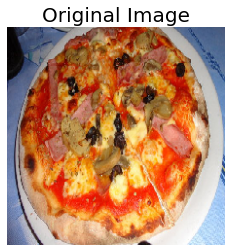

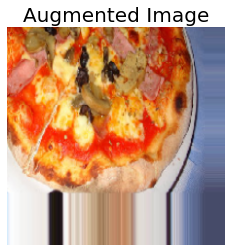

In [ ]:
# show original image and augmented image 
random_number = random.randint(0, 32) # we are making batches of size 32, so we'll get a random instance 
plt.imshow(images[random_number])
plt.title("Original Image", size=20)
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented Image",size=20)
plt.axis(False)

# Shuffling = False

In [ ]:
model_6 = Sequential([
                      Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
                      MaxPool2D(pool_size=2), # reduce number of features by half 
                      Conv2D(10, 3, activation="relu"), 
                      MaxPool2D(),
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation="sigmoid")
])

model_6.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = Adam(),
    metrics = ["accuracy"]
)


history_6 = model_6.fit(
    train_data_augmented,
    epochs=5, 
    steps_per_epoch = len(train_data_augmented),
    validation_data = test_data,
    validation_steps = len(test_data)
)

Epoch 1/5
47/47 [==============================] - 22s 455ms/step - loss: 0.7304 - accuracy: 0.4520 - val_loss: 0.6864 - val_accuracy: 0.6500
Epoch 2/5
47/47 [==============================] - 21s 447ms/step - loss: 0.7880 - accuracy: 0.5407 - val_loss: 0.6795 - val_accuracy: 0.7080
Epoch 3/5
47/47 [==============================] - 21s 449ms/step - loss: 0.6930 - accuracy: 0.5220 - val_loss: 0.6814 - val_accuracy: 0.6420
Epoch 4/5
47/47 [==============================] - 21s 450ms/step - loss: 0.6889 - accuracy: 0.5813 - val_loss: 0.6702 - val_accuracy: 0.6460
Epoch 5/5
47/47 [==============================] - 21s 450ms/step - loss: 0.6810 - accuracy: 0.5833 - val_loss: 0.6405 - val_accuracy: 0.7400


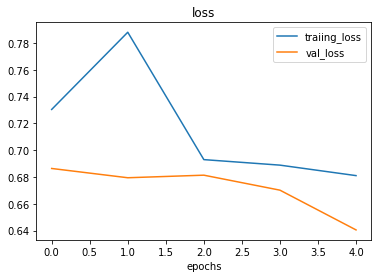

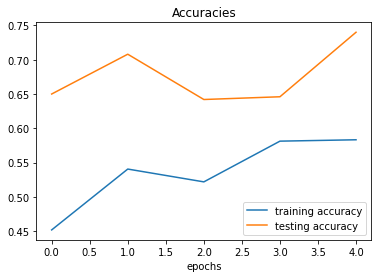

In [ ]:
plot_loss_curves(history_6)

In [ ]:
# Import data and augment it from directories 
train_data_augmente_shuffled = train_datagen_augmented.flow_from_directory(
    train_dir, 
    target_size=(224, 224),
    batch_size=32, 
    class_mode="binary",
    shuffle=True
)

Found 1500 images belonging to 2 classes.


In [ ]:
model_7 = Sequential([
                      Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
                      MaxPool2D(),
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(),
                      Conv2D(10,3, activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation="sigmoid")
])



# compile the model 
model_7.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer = Adam(),
    metrics= ["accuracy"]
)


# fit the model 
history_7 = model_7.fit(
    train_data_augmente_shuffled,
    epochs=5, 
    steps_per_epoch = len(train_data_augmente_shuffled),
    validation_data = test_data, 
    validation_steps = len(test_data)
)

Epoch 1/5
47/47 [==============================] - 22s 458ms/step - loss: 0.6587 - accuracy: 0.5960 - val_loss: 0.4878 - val_accuracy: 0.7820
Epoch 2/5
47/47 [==============================] - 21s 446ms/step - loss: 0.5938 - accuracy: 0.6920 - val_loss: 0.4386 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 21s 448ms/step - loss: 0.5406 - accuracy: 0.7253 - val_loss: 0.3958 - val_accuracy: 0.8180
Epoch 4/5
47/47 [==============================] - 21s 450ms/step - loss: 0.4936 - accuracy: 0.7627 - val_loss: 0.3614 - val_accuracy: 0.8300
Epoch 5/5
47/47 [==============================] - 21s 453ms/step - loss: 0.5171 - accuracy: 0.7380 - val_loss: 0.3600 - val_accuracy: 0.8440


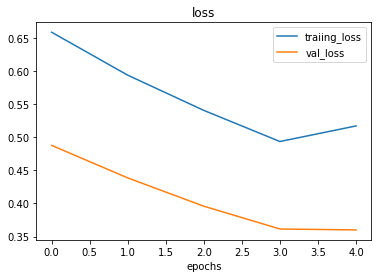

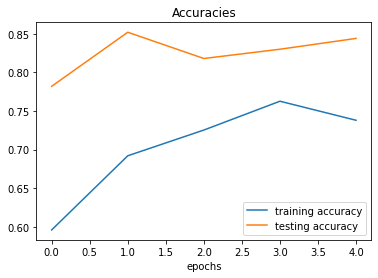

In [ ]:
plot_loss_curves(history_7)

In [ ]:
# Make a prediction with our trainin model on our own custom data
print(class_names)

['pizza' 'steak']


In [ ]:
pizza = mpimg.imread('pizza_test.jpeg')


(-0.5, 719.5, 928.5, -0.5)

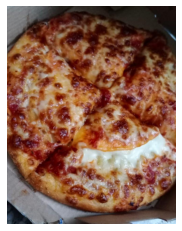

In [ ]:
plt.imshow(pizza)
plt.axis(False)

In [ ]:
pizza.shape

(929, 720, 3)

In [ ]:
# Writing a helper functions to preprocess the data 
def load_and_prep_image(filename, img_shape=224):
    """
    Reads an image from filename, turns it into a tensor and reshapes it to (img_shape, img_shape, color_channels).
    """
    # Read in the image
    img = tf.io.read_file(filename)

    # decode it to the tensor 
    img = tf.image.decode_jpeg(img)
    # resize the image
    img = tf.image.resize(img, size = [img_shape, img_shape])
    # Rescale the image ( Get all values between 0 and 1)

    img = img/255.
    return img


In [ ]:
# load in and preproess our custom images 
class_predicted = load_and_prep_image("steak.jpeg", model_7, class_names)

In [ ]:
class_predicted

'steak'

In [ ]:
def pred_plot(model, filename,class_names=class_names):
    # IMPORT the target image and preprocess it 
    img = load_and_prep_image(filename)

    # make a predictions
    pred = model.predict(tf.expand_dims(img, axis=0))

    # get the predicted class 
    pred_class = class_names[int(tf.round(pred))]

    # plot the image and predicted class 
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)

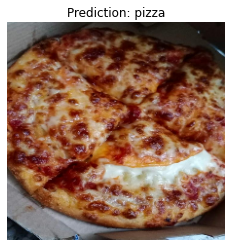

In [ ]:
pred_plot(model_7, "pizza_test.jpeg")